In [1]:
import pandas as pd
df=pd.read_csv('breast-cancer.csv')
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [2]:
from sklearn.preprocessing import LabelEncoder
X = X.drop(columns=['Unnamed: 32'])
le = LabelEncoder()
Y = le.fit_transform(Y)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
 
# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# 2. Feature Selection
selector = SelectKBest(score_func=f_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Selected Features:", X.columns[selector.get_support()])

# 3. Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# 4. Prediction
y_pred = model.predict(X_test_selected)

# 5. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Features: Index(['radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')
Accuracy: 0.9532163742690059
Confusion Matrix:
 [[105   3]
 [  5  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



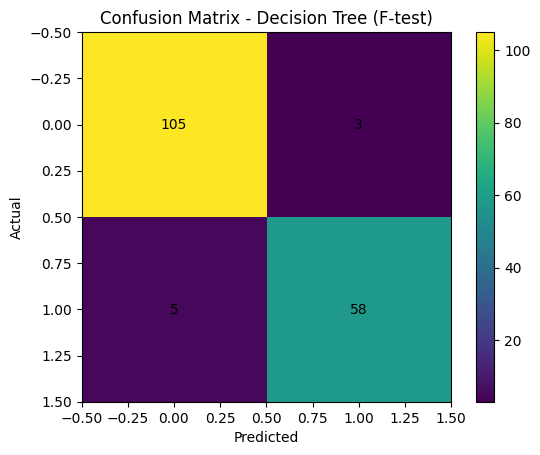

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix - Decision Tree (F-test)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()


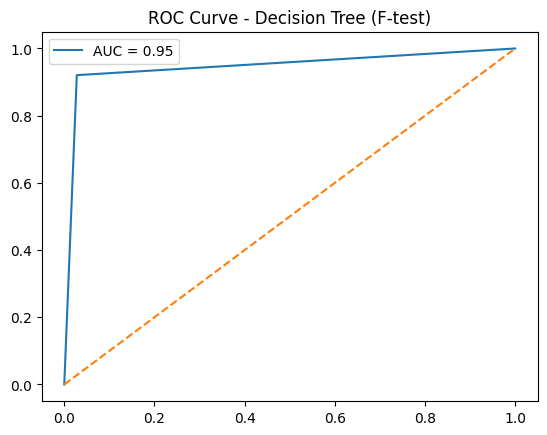

In [5]:
y_prob = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve - Decision Tree (F-test)")
plt.show()


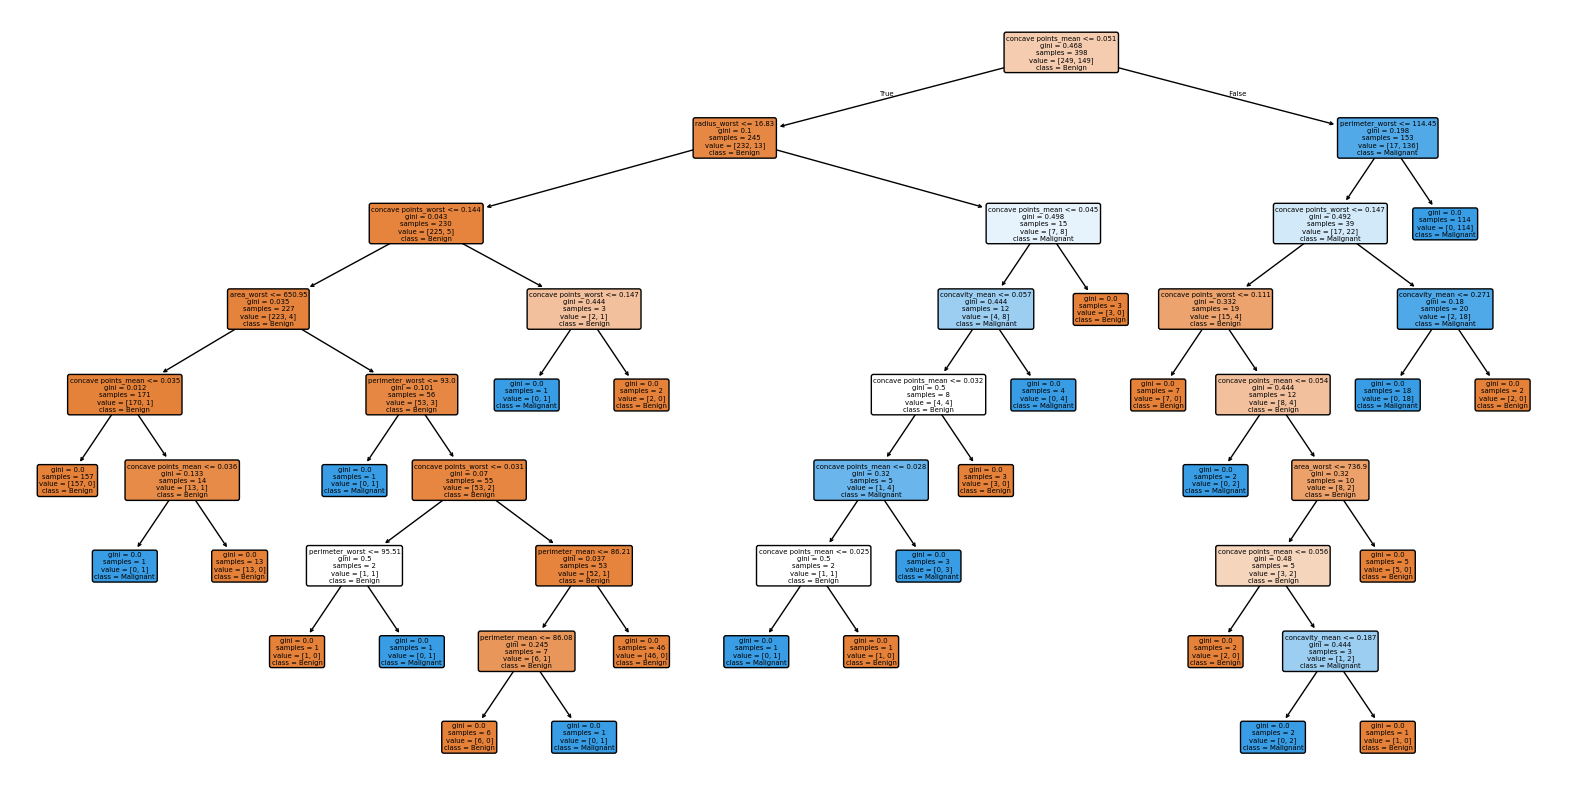

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns[selector.get_support()],
    class_names=['Benign', 'Malignant'],
    filled=True,
    rounded=True,
)
plt.show()

Chi2 Test

In [6]:


# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# 2. Scaling (MANDATORY for chi2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Feature Selection
selector = SelectKBest(score_func=chi2, k=7)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print("Selected Features:", X.columns[selector.get_support()])

# 4. Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# 5. Prediction
y_pred = model.predict(X_test_selected)

# 6. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Features: Index(['concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
Accuracy: 0.9532163742690059
Confusion Matrix:
 [[105   3]
 [  5  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



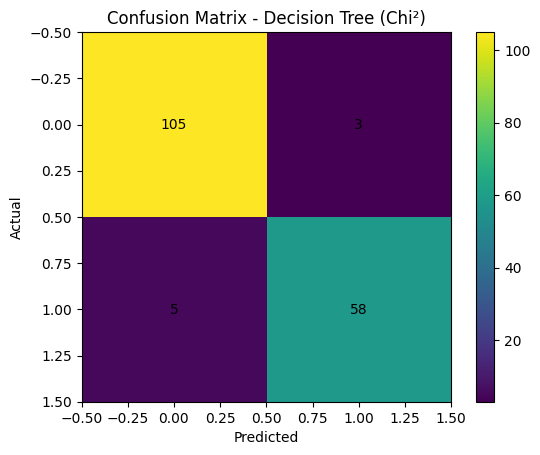

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix - Decision Tree (Chi²)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()


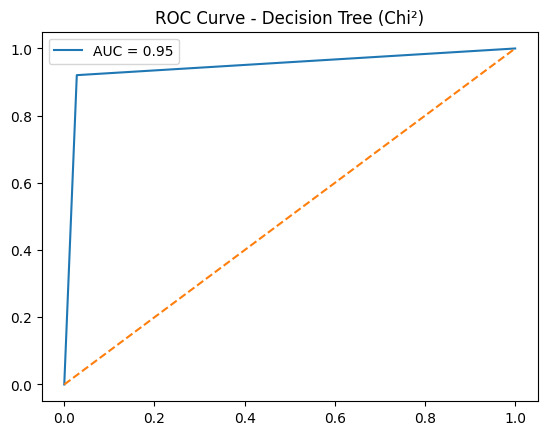

In [8]:
y_prob = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve - Decision Tree (Chi²)")
plt.show()


Mutual_classif

In [9]:

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# 2. Feature Selection
selector = SelectKBest(score_func=mutual_info_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Selected Features:", X.columns[selector.get_support()])

# 3. Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# 4. Prediction
y_pred = model.predict(X_test_selected)

# 5. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Features: Index(['perimeter_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')
Accuracy: 0.9298245614035088
Confusion Matrix:
 [[104   4]
 [  8  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



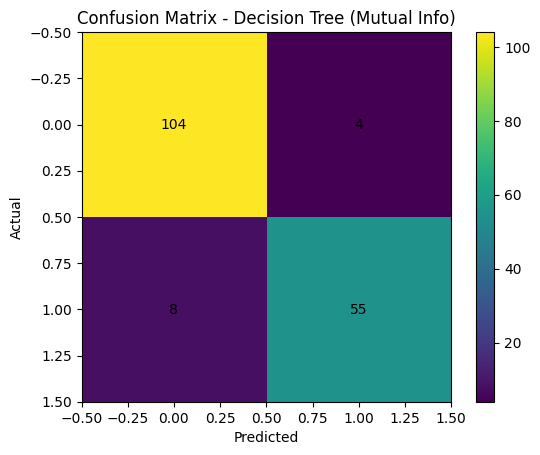

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix - Decision Tree (Mutual Info)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()


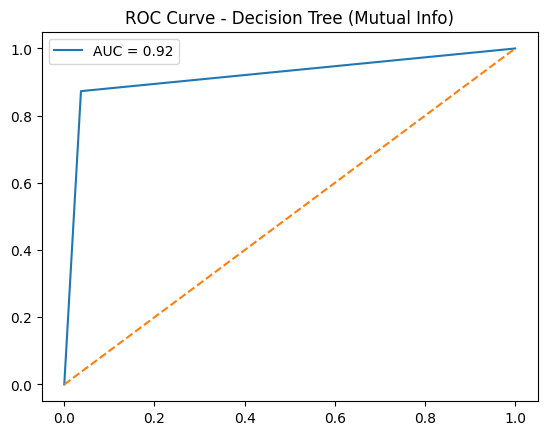

In [11]:
y_prob = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve - Decision Tree (Mutual Info)")
plt.show()
